# 1. 언어모델 (Language Model)

- 언어 모델(Languagel Model)이란 **단어 시퀀스(문장)에 확률을 할당하는 모델**
- 언어 모델을 만드는 방법은 크게는 **통계를 이용한 방법**과 **인공 신경망을 이용한 방법**으로 구분
- 최근에는 통계를 이용한 방법보다는 인공 신경망을 이용한 방법이 더 좋은 성능을 보여주고 있음
  - 최근 화두인 자연어 처리의 기술인 GPT나 BERT 또한 인공 신경망 언어 모델의 개념을 사용

<br>

<br>

## 1-1. 언어 모델(Language Model)

- 언어 모델은 단어 시퀀스에 확률을 할당(assign) 하는 일을 하는 모델
  - 이를 조금 풀어서 쓰면, 언어 모델은 가장 자연스러운 단어 시퀀스를 찾아내는 모델
  - 단어 시퀀스에 확률을 할당하게 하기 위해서 가장 보편적으로 사용되는 방법은, **언어 모델이 이전 단어들이 주어졌을 때 다음 단어를 예측하도록 하는 것**
  - 다른 유형의 언어 모델로는, **주어진 양쪽의 단어들로부터 가운데 비어있는 단어를 예측하는 언어 모델**
    - 이는 문장의 가운데에 있는 단어를 비워놓고 양쪽의 문맥을 통해서 빈 칸의 단어인지 맞추는 문제와 유사 (e.g BERT)
- 언어 모델에 -ing를 붙인 언어 모델링(Language Modeling)은 주어진 단어들로부터 아직 모르는 단어를 예측하는 작업
  - 언어 모델이 이전 단어들로부터 다음 단어를 예측하는 일은 언어 모델링


<br>

<br>

## 1-2. 단어 시퀀스의 확률 할당

<br> 

### a. 기계 번역(Machine Translation):

```
P(나는 버스를 탔다) > P(나는 버스를 태운다)
```

- 언어 모델은 두 문장을 비교하여 좌측의 문장의 확률이 더 높다고 판단

<br>

### b. 오타 교정(Spell Correction)

```
선생님이 교실로 부리나케  

P(달려갔다) > P(잘려갔다)  
```

- 언어 모델은 두 문장을 비교하여 좌측의 문장의 확률이 더 높다고 판단합

<br>

### c. 음성 인식(Speech Recognition)

```
P(나는 메롱을 먹는다) < P(나는 메론을 먹는다)
```

- 언어 모델은 두 문장을 비교하여 우측의 문장의 확률이 더 높다고 판단

<br>

<br>

## 1-3. 주어진 이전 단어들로부터 다음 단어 예측하기

- 단어 시퀀스에 확률을 할당하기 위해서 가장 보편적으로 사용하는 방법은, **이전 단어들이 주어졌을 때, 다음 단어를 예측하도록 하는 것**

<br>

### a. 단어 시퀀스의 확률
- 하나의 단어를 $w$, 단어 시퀀스를 $W$라 한다면, $n$개의 단어가 등장하는 단어 시퀀스 $W$의 확률은

#### $$P(W) = P(w_1, w_2, , ... w_n)$$

<br>

### b. 다음 단어 등장 확률
- $n-1$개의 단어가 나열된 상태에서, $n$번째 단어의 확률

#### $$P(w_n | w_1, ... w_{n-1})$$

- 전체 단어 시퀀스 $W$의 확률은 모든 단어가 예측되고 나서야 알 수 있으므로, 단어 시퀀스의 확률은

#### $$P(W) = p(w_1, w_2, ... w_n) = \Pi^n_{i=1} P(w_i | w_1, ... w_{i-1}) $$

<br> 

<br> 

# 2. 통계적 언어 모델 (Statistical Language Model, SLM) 

<br>

<br>

## 2-1. 조건부 확률
- 조건부 확률은 두 확률 $P(A)$, $P(B)$에 대해서

#### $$P(B|A) = {{P(A, B)} \over {P(A)}}$$

- n개의 확률이 조건부 확률의 관계를 가질 때, **연쇄법칙 (Chain Rule)**

#### $$P(x_1, x_2, x_3, ... x_n) = P(x_1)P(x_2|x_1)P(x_3|x_1,x_2)P(x_4|x_1,x_2,x_3)...P(x_n|x_1, ... x_{n-1})$$

<br>

<br>

## 2-2. 문장에 대한 확률

- 각 단어는 문맥이라는 관계로 인해, 이전 단어의 영향을 받아 나온 단어. 그리고 모든 단어로부터 하나의 문장이 완성
- 그렇기 때문에 문장의 확률은 각 단어들이 이전 단어가 주어졌을 때 다음 단어로 등장할 확률의 곱으로 구성

$$P(An\;adorable\;little\;boy\;is\;spreading\;smiles)$$

$$= P(An) \times P(adorable|An) \times P(little|An\;adorable) \times P(boy|An\;adorable\;little) \times\;...\;P(smiles|An\;adorable\;little\;boy\;is\;spreading\;smiles)$$

<br>

<br>

## 2-3. 카운트 기반의 접근
- **SLM은 이전 단어로부터 다음 단어에 대한 확률을 카운트에 기반하여 확률을 계산**

$$P(is|An\;adorable\;little\;boy)\;=\;{{count(An\;adorable\;little\;boy\;is)}\over{count(An\;adorable\;little\;boy)}}$$

- An adorable little boy가 100번 등장했는데 그 다음에 is가 등장한 경우는 30번이라고 할 때, 이 경우 $P(is|An\;adorable\;little\;boy)$ 
는 30%

<br>

<br>

## 2-4. 카운트 기반 접근의 한계 - 희소 문제 (Sparsity Problem)
- 언어 모델은 실생활에서 사용되는 언어의 확률 분포를 근사 모델링
- 현실에서 'An adorable little boy'가 나왔을 때 'is'가 나올 확률이라는 것이 존재한다면, **이를 실제 자연어의 확률 분포, 현실에서의 확률 분포라고 명칭**
- 기계에게 많은 코퍼스를 훈련시켜서 언어 모델을 통해 현실에서의 확률 분포를 근사하는 것이 언어 모델의 목표
- **그런데 카운트 기반으로 접근하려고 한다면 갖고있는 코퍼스(corpus). 즉, 다시 말해 기계가 훈련하는 데이터는 정말 방대한 양이 필요**

$$P(is|An\;adorable\;little\;boy)\;=\;{{count(An\;adorable\;little\;boy\;is)}\over{count(An\;adorable\;little\;boy)}}$$

- 위와 같이 $P(is|An\;adorable\;little\;boy)$를 구하는 경우에서, **기계가 훈련한 코퍼스에 'An adorable little boy is'라는 단어 시퀀스가 없었다면, 이 단어 시퀀스에 대한 확률은 0 'An adorable little boy'라는 단어 시퀀스가 없었다면 분모가 0이 되어 확률은 정의되지 않음**
- **이와 같이 충분한 데이터를 관측하지 못하여 언어를 정확히 모델링하지 못하는 문제를 희소 문제(sparsity problem)라고 합니다.**
- 위 문제를 완화하는 방법으로 n-gram 언어 모델, Smoothing, Back-Off와 같은 여러가지 일반화(generalization) 기법이 존재 (하지만 희소 문제에 대한 근본적인 해결책은 되지 못함)
- **결국 이러한 한계로 인해 언어 모델의 트렌드는 통계적 언어 모델에서 인공 신경망 언어 모델로 넘어감**

<br>

<br>

# 3. N-gram 언어모델 (N-gram Language Model)

<br>

<br>

## 3-1. 코퍼스에서 카운트하지 못하는 경우의 감소

- SLM의 한계는 훈련 코퍼스에 확률을 계산하고 싶은 문장이나 단어가 없을 수 있다는 점
- 그리고 확률을 계산하고 싶은 문장이 길어질수록 갖고있는 코퍼스에서 그 문장이 존재하지 않을 가능성이 높아짐
- 다음과 같이 참고하는 단어들을 줄이면 카운트를 할 수 있을 가능성을 높일 수 있음

<br>

$$P(is|An\;adorable\;little\;boy) \approx P(is|boy)$$

- **'An adorable little boy'가 나왔을 때 'is'가 나올 확률을, 그냥 'boy'가 나왔을 때 'is'가 나올 확률로 생각한다며 단어 시퀀스가 존재할 가능성이 증가**


<br>

<br>

## 3-2. N-gram
- **n-gram은 n개의 연속적인 단어 나열을 의미**
- 갖고 있는 코퍼스에서 n개의 단어 뭉치 단위로 끊어서 이를 하나의 토큰으로 간주
  - 예를 들어, 문장 'An adorable little boy is spreading smiles'이 있을 때, 각 n에 대해서 n-gram을 전부 구한다면

**unigrams** : an, adorable, little, boy, is, spreading, smiles

**bigrams** : an adorable, adorable little, little boy, boy is, is spreading, spreading smiles

**trigrams** : an adorable little, adorable little boy, little boy is, boy is spreading, is spreading smiles

**4-grams** : an adorable little boy, adorable little boy is, little boy is spreading, boy is spreading smiles

<br> 

- **n-gram을 통한 언어 모델에서는 다음에 나올 단어의 예측은 오직 n-1개의 단어에만 의존**
  - 예를 들어, 'An adorable little boy is spreading' 다음에 나올 단어를 예측하고 싶다고 할 때, n=4라고 한 4-gram을 이용한 언어 모델을 사용한다면. 이 경우, 'spreading' 다음에 올 단어를 예측하는 것은 n-1에 해당되는 앞의 3개의 단어만을 고려

![n-gram[1].PNG](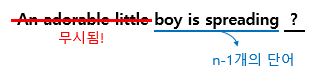)

$$P(w|boy\;is\;spreading)\;=\;{{count(boy\;is\;spreading\;w)}\over{count(boy\;is\;spreading}}$$

- 만약 갖고있는 코퍼스에서 'boy is spreading'이 1,000번 등장했고 'boy is spreading insults'가 500번 등장했으며, 'boy is spreading smiles'가 200번 등장했다면. 'boy is spreading' 다음에 insults가 등장할 확률은 50%이며, 'smiles'가 등장할 확률은 20%입니다. 확률적 선택에 따라 우리는 'insults'가 더 맞다고 판단

$$P(insults|boy\;is\;spreading) = 0.5$$

$$P(smiles|boy\;is\;spreading) = 0.2$$

<br>

<br>

## 3-3. N-gram Language Model의 한계

### a. 희소 문제(Sparsity Problem)
- 문장에 존재하는 앞에 나온 단어를 모두 보는 것보다, 일부 단어만을 보는 것으로 현실적으로 코퍼스에서 카운트 할 수 있는 확률을 높일 수는 있었지만, **n-gram 언어 모델도 여전히 n-gram에 대한 희소 문제가 존재**

<br>

### b. n을 선택하는 것은 trade-off 문제
- **n을 크게 선택하면 실제 훈련 코퍼스에서 해당 n-gram을 카운트할 수 있는 확률은 적어지므로 희소 문제는 점점 심각**
  - n이 커질수록 모델 사이즈가 커진다는 문제점도 존재 (기본적으로 코퍼스의 모든 n-gram에 대해서 카운트를 해야 하기 때문)
- n을 작게 선택하면 훈련 코퍼스에서 카운트는 잘 되지만, 근사의 정확도는 현실의 확률분포와 멀어짐. 
- **trade-off 문제로 인해 정확도를 높이려면 n은 최대 5를 넘게 잡아서는 안 된다고 권장되고 있습니다**

<br>

#### n이 성능에 영향을 주는 것을 확인할 수 있는 예제
- 스탠퍼드 대학교의 공유 자료에 따르면, 월스트리트 저널에서 3,800만 개의 단어 토큰에 대하여 n-gram 언어 모델을 학습하고, 1,500만 개의 테스트 데이터에 대해서 테스트를 했을 때, **n을 1에서 2, 2에서 3으로 올릴 때마다 성능이 올라가는 것을 보여줌**

| | Unigram | Bigram | Trigram |
| -- | -- | -- | -- |
| Perplexity | 962 | 170 | 109 |

<br>

<br>

## 3-4. 적용 분야(Domain)에 맞는 코퍼스의 수집
- **어떤 분야인지, 어떤 어플리케이션인지에 따라서 특정 단어들의 확률 분포는 상이하기에 유의가 필요**

<br>

<br>

# 4. 한국어에서의 언어 모델(Language Model for Korean Sentences)

<br> 

<br>

## 4-1. 한국어는 어순이 중요하지 않다.
- 한국어에서는 어순이 중요하지 않음
  - 이전 단어가 주어졌을때 다음 단어가 나타날 확률을 구해야하는데, **어순이 중요하지 않다는 것은 다음 단어로 어떤 단어든 등장할 수 있다는 의미**

  ```
  1. 나는 운동을 합니다 체육관에서.  
  2. 나는 체육관에서 운동을 합니다.  
  3. 체육관에서 운동을 합니다.  
  4. 나는 운동을 체육관에서 합니다.
  ```

<br>

<br>

## 4-2. 한국어는 교착어
- 한국어는 교착어이기에 한국어에서의 언어 모델 작동이 어려움. 
- 띄어쓰기 단위인 어절 단위로 토큰화를 할 경우에는 문장에서 발생가능한 단어의 수가 굉장히 늘어남. 
- **영어는 기본적으로 조사가 없지만, 하지만 한국어에는 어떤 행동을 하는 동사의 주어나 목적어를 위해서 조사라는 것이 존재**
  -  **한국어에서는 토큰화를 통해 접사나 조사 등을 분리하는 것은 중요**
```
그녀 : 그녀가, 그녀를, 그녀의, 그녀와, 그녀로, 그녀께서, 그녀처럼 등과 같이 다양한 경우가 존재
```

<br>

<br>

## 4-3. 한국어는 띄어쓰기가 제대로 지켜지지 않는다.
- 한국어는 띄어쓰기를 제대로 하지 않아도 의미가 전달됨
- 띄어쓰기 규칙 또한 상대적으로 까다로운 언어이기 때문에 자연어 처리를 하는 것에 있어서 한국어 코퍼스는 띄어쓰기가 제대로 지켜지지 않는 경우가 많음
- 토큰이 제대로 분리 되지 않은채 훈련 데이터로 사용된다면 언어 모델은 제대로 동작하지 않습니다.



<br>

<br>

# 5. Perplexity (PPL)

<br>

<br>

## 5-1. 언어 모델의 평가 방법(Evaluation metric) : PPL
- Pperplexity : 언어 모델을 평가하기 위한 평가 지표입니다.
  - ('perplexed'는 '헷갈리는'과 유사한 의미) 
- PPL은 수치가 높으면 좋은 성능을 의미하는 것이 아니라, **'낮을수록' 언어 모델의 성능이 좋다는 것을 의미**

<br>

- **PPL은 문장의 길이로 정규화된 문장 확률의 역수. 문장 $W$의 길이가 $N$이라고 하였을 때,**

$$PPL(W) = P(w_1, w_2, ... w_N)^{-{1 \over N}} = \sqrt[N]{{{1}\over{P(w_1, w_2, ... w_N)}}}$$

$$= \sqrt[N]{{1}\over{\Pi^N_{i=1} P(w_i|w_1, w_2, ... w_{i-1})}}$$

<br>

<br>

## 5-2. 분기 계수(Branching factor)
- **PPL은 선택할 수 있는 가능한 경우의 수를 의미하는 분기계수(branching factor)**
- PPL은 이 언어 모델이 특정 시점에서 평균적으로 몇 개의 선택지를 가지고 고민하고 있는지를 의미
  - **가령, 언어 모델에 어떤 테스트 데이터을 주고 측정했더니 PPL이 10이 나왔을 때 :** 

    **해당 언어 모델은 테스트 데이터에 대해서 다음 단어를 예측하는 모든 시점(time step)마다 평균 10개의 단어를 가지고 어떤 것이 정답인지 고민하고 있다고 볼 수 있음**
  - **같은 테스트 데이터에 대해서 두 언어 모델의 PPL을 각각 계산 후에 PPL의 값을 비교하면, 두 언어 모델 중 PPL이 더 낮은 언어 모델의 성능이 더 좋다고 볼 수 있음**

$$PPL(W) = P(w_1, w_2, w_3, ... w_N)^{- {1 \over N}} = {{1 \over 10}^N}^{-{1 \over N}} = {1 \over 10}^{-1} = 10$$

- **단, 평가 방법에 있어서 주의할 점은 PPL의 값이 낮다는 것은 테스트 데이터 상에서 높은 정확도를 보인다는 것 이지, 사람이 직접 느끼기에 좋은 언어 모델이라는 것을 반드시 의미하진 않는다는 점**
- **또한 언어 모델의 PPL은 테스트 데이터에 의존하므로 두 개 이상의 언어 모델을 비교할 때는 정량적으로 양이 많고, 또한 도메인에 알맞은 동일한 테스트 데이터를 사용해야 신뢰도가 높음**